## This program utilizes the K-means clustering algorithm to analyze the Iris dataset and determine the optimum number of clusters. Here's a summary of the explanation:

In [1]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

## The program first loads the Iris dataset using the load_iris() function from scikit-learn and creates a Pandas DataFrame to store the data.

In [4]:
#Load iris dataset
iris=load_iris()
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### The line x = iris_df.iloc[:, [0, 1, 2, 3]].values extracts the values from the Iris DataFrame for the columns at indices 0, 1, 2, and 3. It creates a NumPy array x containing these values, which can be used for further analysis or as input for machine learning algorithms.

In [5]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

## The program then performs K-means clustering for different numbers of clusters, ranging from 1 to 10, and calculates the inertia (within-cluster sum of squares) for each clustering result. The inertia is a measure of how well the data points within each cluster are grouped together.

In [6]:
# Perform K-means clustering for different numbers of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)


## An "elbow curve" is plotted using Matplotlib to visualize the relationship between the number of clusters and the inertia. The elbow point on the curve represents a good trade-off between the compactness of clusters and the number of clusters, helping us determine the optimal number of clusters.

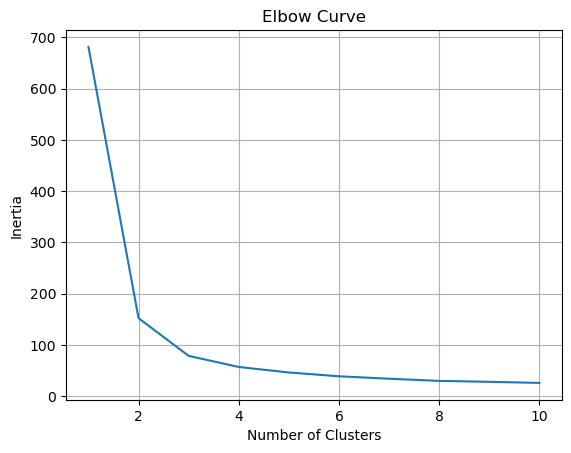

In [7]:
# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

## Once the optimal number of clusters is determined, the program performs K-means clustering again using the optimal number of clusters.

In [8]:
# Perform K-means clustering with the optimal number of clusters
optimal_clusters = 3  # Set the optimal number of clusters based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans=kmeans.fit_predict(x)

## Finally, the program plots the clusters on a scatter plot, with the x-axis representing the sepal length and the y-axis representing the sepal width. Each data point is colored based on its assigned cluster label, and grid lines are added to the plot for better visualization.

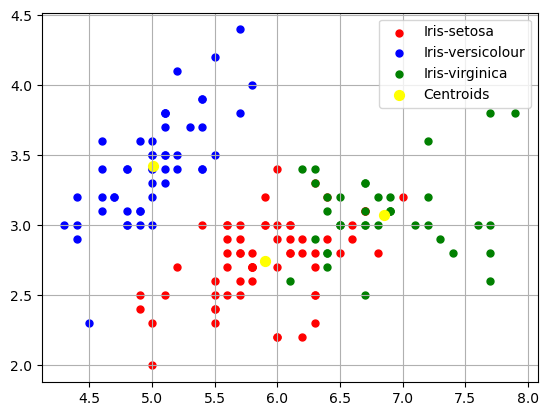

In [9]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')
plt.grid(True)
plt.legend()

## Unsupervised ML is valuable in applications like

### 1)exploratory data analysis

### 2)discovering hidden patterns

### 3)clustering

### 4)anomaly detection

### 5)dimensionality reduction

## It plays a crucial role in understanding and extracting insights from unlabeled data in diverse domains.

# Note: Make sure to install the necessary packages like pandas, numpy, matplotlib, and scikit-learn if you haven't already. You can use the pip install command to install them.